In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as color
import skimage.data as skdata
from project.algorithms.simulation import dummy_object, ptychogram, mesh, illumination_beam
from project.algorithms.utils import circ_aperture, normalize, hsv_convert
from project.algorithms.reconstruction import epie, epie_unknown_pos

In [2]:
# Turn off for white background/jupyter notebook
background_dark = True
if background_dark:
    plt.style.use('dark_background')

In [3]:
intensity = np.array(plt.imread('lena.tif'))
phase = skdata.camera()
obj = dummy_object(intensity=intensity, phase=phase, output_shape=(128, 128))
box_shape= (81, 81)   # the size of reconstruction box
r = 0.75
illumination = illumination_beam(box_shape, beam_radius=r)
illumination = normalize(illumination)
norm = color.Normalize(-np.pi, np.pi)
rainbow = cm.ScalarMappable(norm=norm, cmap='rainbow')
gray = cm.ScalarMappable(cmap='gray')

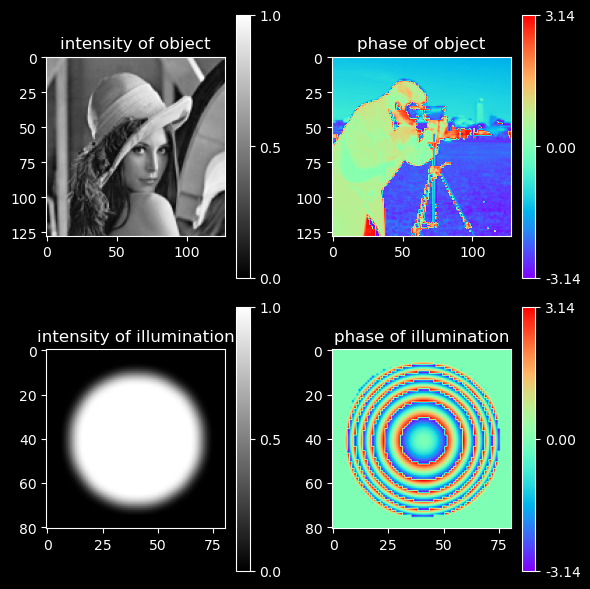

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0, 0].imshow(np.abs(obj), cmap='gray')
axes[0, 0].set_title('intensity of object')
plt.colorbar(gray, ax=axes[0, 0], ticks=[0, 0.5, 1], format='%.1f')
axes[0, 1].imshow(np.angle(obj), cmap='rainbow')
axes[0, 1].set_title('phase of object')
plt.colorbar(rainbow, ax=axes[0, 1], ticks=[-np.pi, 0, np.pi], format='%.2f')
axes[1, 0].imshow(np.abs(illumination), cmap='gray')
axes[1, 0].set_title('intensity of illumination')
plt.colorbar(gray, ax=axes[1, 0], ticks=[0, 0.5, 1], format='%.1f')
axes[1, 1].imshow(np.angle(illumination), cmap='rainbow')
plt.colorbar(rainbow, ax=axes[1, 1], ticks=[-np.pi, 0, np.pi], format='%.2f')
axes[1, 1].set_title('phase of illumination')
plt.tight_layout()

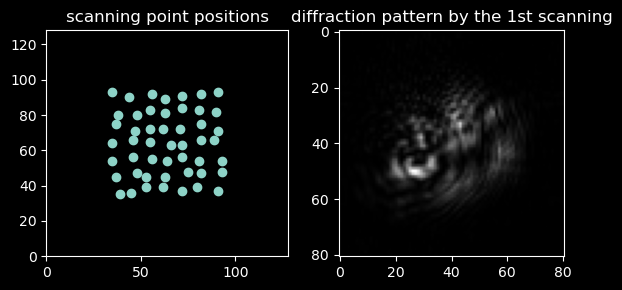

In [5]:
positions = np.load('positions.npy')
patterns = []
for position in positions:
    pattern = ptychogram(obj, illumination, position)
    patterns.append(pattern)
fig, axes = plt.subplots(1,2,figsize=(6,3))
axes[0].scatter(*np.transpose(positions))
axes[0].set_title('scanning point positions')
axes[0].set_xlim(0, 128)
axes[0].set_ylim(0, 128)
axes[1].imshow(patterns[0], cmap='gray')
axes[1].set_title('diffraction pattern by the 1st scanning')
plt.tight_layout()

In [6]:
guess_probe = circ_aperture(box_shape, radius=0.6)*(1+0j)
guess_position = positions.copy()
recon_obj, recon_probe, revise_pos, loss = \
    epie_unknown_pos(patterns, guess_probe, guess_position,obj.shape, n_iter=100, delta=2)

(0.0, 128.0)

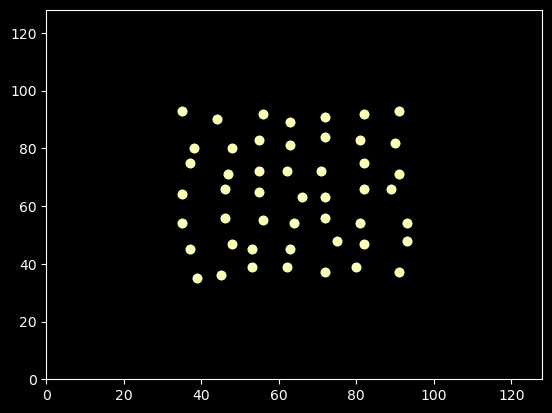

In [7]:
plt.scatter(*np.transpose(positions))
plt.scatter(*np.transpose(revise_pos))
plt.xlim(0,128)
plt.ylim(0,128)

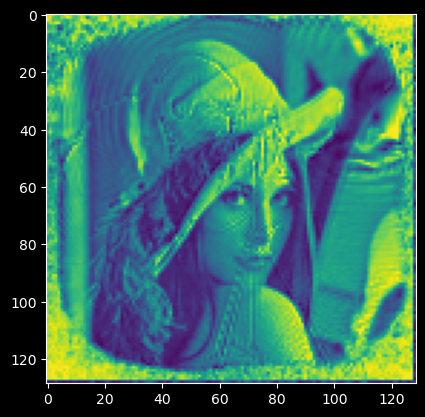

In [8]:
plt.imshow(np.abs(recon_obj))

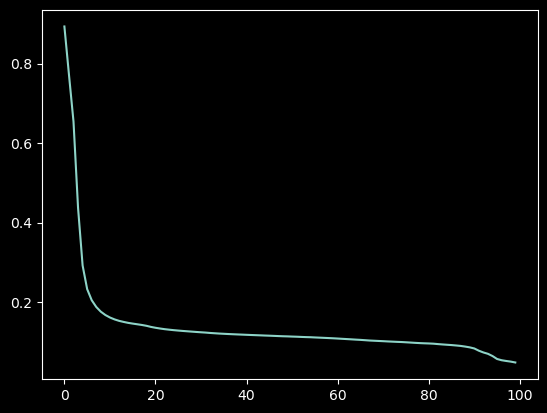

In [9]:
loss = np.array(loss)
plt.plot(np.mean(loss, 1))